In [4]:
# Practical Coding and Math, HW 3
# 13 September 2024


In [5]:
from datetime import timedelta

import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
#df = pd.DataFrame(data, index=['Mercury', 'Venus', 'Earth'])  Reference code

#1. Read the hurricane data into a Pandas dataframe.
data = pd.read_csv("hurricane_data_after2000.csv")
data # display data

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,567567,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 03:00:00,TS,-12.7476,48.4301,NaN,NaN
1,567568,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 06:00:00,TS,-12.7333,47.9000,25.0,1000.0
2,567569,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 09:00:00,TS,-12.6807,47.5150,NaN,NaN
3,567570,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 12:00:00,TS,-12.6333,47.2000,25.0,1000.0
4,567571,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 15:00:00,TS,-12.6183,46.8858,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145102,712669,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 12:00:00,TS,12.5333,-102.3330,NaN,NaN
145103,712670,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 15:00:00,TS,12.8590,-102.8870,NaN,NaN
145104,712671,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 18:00:00,TS,13.2667,-103.3330,NaN,NaN
145105,712672,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 21:00:00,TS,13.1848,-103.9340,NaN,NaN


In [6]:
# 2. Make ISO_TIME the index on your dataframe
## MM Comment: Need to make the ISO_TIME column a datetime object
#df = pd.DataFrame(data, index=['ISO_TIME'])

data["ISO_TIME"] = pd.to_datetime(data["ISO_TIME"], unit="ns")

df = pd.DataFrame(data)

df = df.set_index('ISO_TIME') 

df
# I don't know why this dataframe looks empty

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
ISO_TIME,,,,,,,,,,,,
2000-01-01 03:00:00,567567,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7476,48.4301,NaN,NaN
2000-01-01 06:00:00,567568,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7333,47.9000,25.0,1000.0
2000-01-01 09:00:00,567569,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6807,47.5150,NaN,NaN
2000-01-01 12:00:00,567570,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6333,47.2000,25.0,1000.0
2000-01-01 15:00:00,567571,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6183,46.8858,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16 12:00:00,712669,2023226N09270,2023,40,EP,MM,HILARY,TS,12.5333,-102.3330,NaN,NaN
2023-08-16 15:00:00,712670,2023226N09270,2023,40,EP,MM,HILARY,TS,12.8590,-102.8870,NaN,NaN
2023-08-16 18:00:00,712671,2023226N09270,2023,40,EP,MM,HILARY,TS,13.2667,-103.3330,NaN,NaN


In [7]:
df.describe()


,Unnamed: 0,SEASON,NUMBER,LAT,LON,WMO_WIND,WMO_PRES
count,145107.000000,145107.000000,145107.000000,145107.000000,145107.000000,60136.000000,67333.000000
mean,640120.000000,2011.188433,50.483808,9.361752,44.685537,47.903652,989.375314
std,41888.927093,6.756382,31.340422,20.265838,107.580596,24.203083,20.290199
min,567567.000000,2000.000000,1.000000,-62.300000,-179.750000,3.000000,872.000000
25%,603843.500000,2005.000000,22.000000,-12.067150,-66.100000,30.000000,982.000000
50%,640120.000000,2011.000000,50.000000,14.928800,85.200000,40.000000,996.000000
75%,676396.500000,2017.000000,76.000000,22.247100,131.991000,60.000000,1004.000000
max,712673.000000,2023.000000,121.000000,70.700000,273.100000,185.000000,1024.000000


In [8]:
# 3. Find the unique values of the BASIN, SUBBASIN, and NATURE columns.

In [9]:
df = pd.DataFrame(data)

df.BASIN.unique() 

array(['SI', 'SP', 'NI', 'WP', 'EP', nan, 'SA'], dtype=object)

In [10]:
df.SUBBASIN.unique()

array(['MM', 'WA', 'EA', 'BB', 'CP', 'GM', nan, 'CS', 'AS'], dtype=object)

In [11]:
df.NATURE.unique()
 

array(['TS', 'NR', 'ET', 'MX', 'SS', 'DS'], dtype=object)

In [12]:
# 4. Rename the WMO_WIND and WMO_PRES columns to WIND and PRES.
## MM Commet: I would recommend using 'df.rename' and you have to 
## assign it to df again for the changes to be saved. (-0.25)

# df.attrs['WMO_WIND'] = 'WIND' #didn't work
#df = df.WMO_WIND.rename('WIND') #this also doesn't seem to work 
#df.WMO_PRES.rename('PRES')
df = df.rename(columns = {'WMO_PRES':'PRES', 'WMO_WIND': 'WIND'})
df

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,567567,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 03:00:00,TS,-12.7476,48.4301,NaN,NaN
1,567568,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 06:00:00,TS,-12.7333,47.9000,25.0,1000.0
2,567569,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 09:00:00,TS,-12.6807,47.5150,NaN,NaN
3,567570,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 12:00:00,TS,-12.6333,47.2000,25.0,1000.0
4,567571,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 15:00:00,TS,-12.6183,46.8858,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145102,712669,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 12:00:00,TS,12.5333,-102.3330,NaN,NaN
145103,712670,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 15:00:00,TS,12.8590,-102.8870,NaN,NaN
145104,712671,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 18:00:00,TS,13.2667,-103.3330,NaN,NaN
145105,712672,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 21:00:00,TS,13.1848,-103.9340,NaN,NaN


In [13]:
gb = df.groupby('WIND') 
gb.WIND.max().nlargest(10)

WIND
185.0    185.0
180.0    180.0
160.0    160.0
155.0    155.0
150.0    150.0
145.0    145.0
140.0    140.0
135.0    135.0
130.0    130.0
127.0    127.0
Name: WIND, dtype: float64

In [14]:
# 6. Group the data on SID and get the 10 largest hurricanes by WIND.
df.groupby('SID')

In [15]:
gb = df.groupby('SID') 
gb.WIND.max().nlargest(10)

SID
2015293N13266    185.0
2005289N18282    160.0
2019236N10314    160.0
2005261N21290    155.0
2009288N07267    155.0
2017242N16333    155.0
2005236N23285    150.0
2007225N12331    150.0
2007244N12303    150.0
2016041S14170    150.0
Name: WIND, dtype: float64

Text(0, 0.5, 'Wind speed')

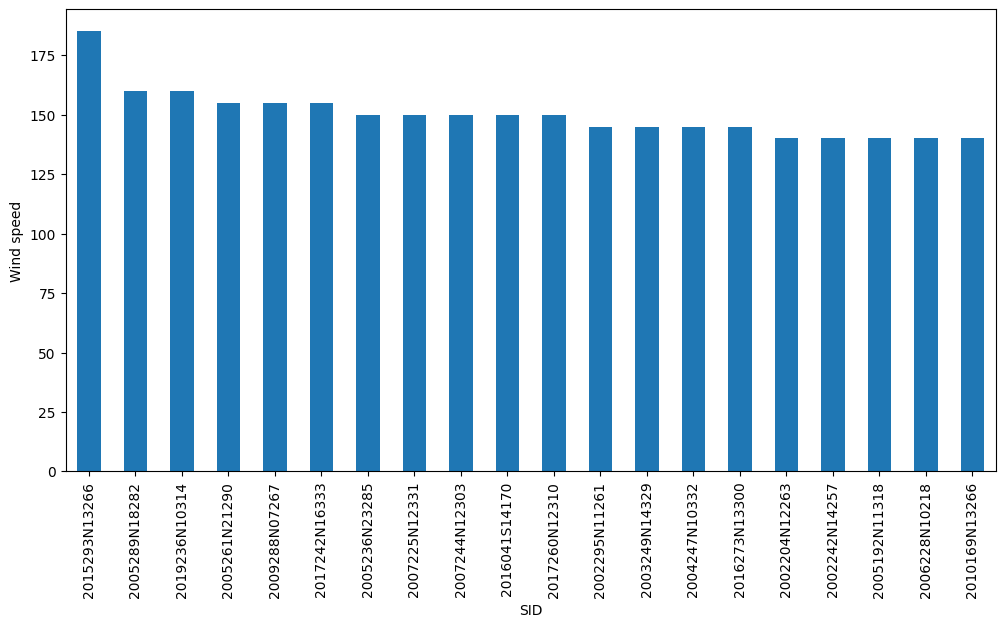

In [16]:
# 7. Make a bar chart of the wind speed of the 20 strongest-wind hurricanes.

# example code:
#df.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6)) 

# attempt code:
gb.WIND.max().nlargest(20).plot(kind='bar', figsize=(12,6)) 
plt.ylabel('Wind speed')


Text(0, 0.5, 'Number of data points')

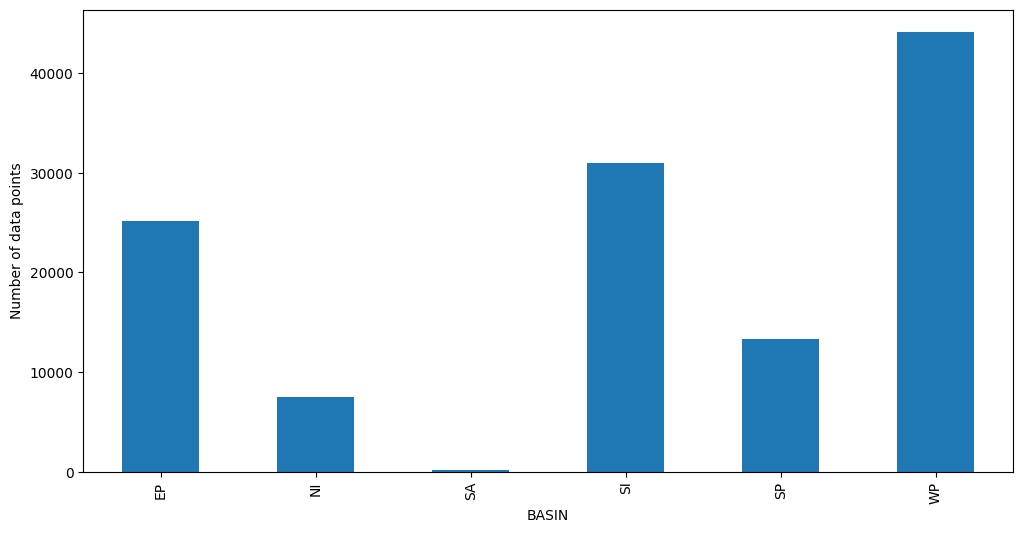

In [17]:
# 8. Plot the count of all datapoints by Basin


# example code:
#df.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6)) 
#bar graph of countries by number of earthquakes

# Attempt code:
gb = df.groupby('BASIN') 
gb.BASIN.count().plot(kind='bar', figsize=(12,6))
plt.ylabel('Number of data points')


In [18]:
# 9. Plot the count of unique hurricanes by Basin.
## MM Comments: Use '.nunique()' instead of just 'unique'
gb = df.groupby('BASIN')

uniquegroups = gb.NAME.nunique()
#gb.NAME.unique()

<Axes: xlabel='BASIN'>

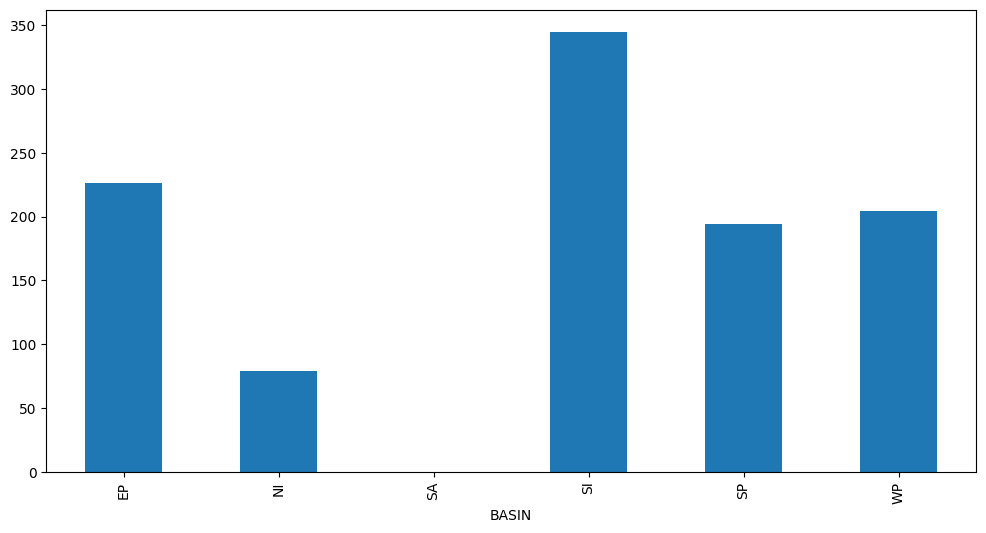

In [19]:

# gb = df.groupby('BASIN') 
# gb.BASIN.count().plot(kind='bar', figsize=(12,6))
# plt.ylabel('Number of data points')

uniquegroups.plot(kind='bar', figsize=(12,6))
# This isn't plotting, but it looks like there's a data object from the chunk above that should be plottable

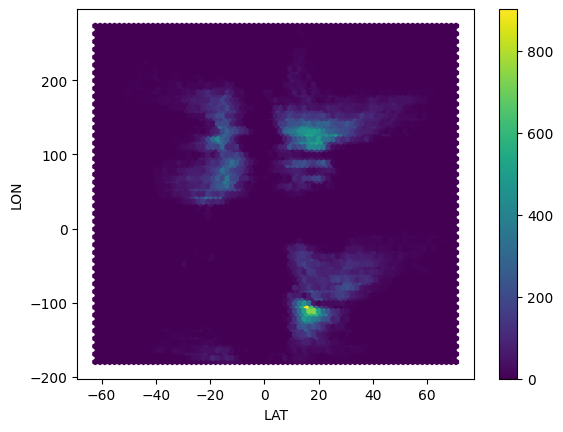

In [20]:
# 10. Make a hexbin of the location of datapoints in Latitude and Longitude.
## MM Comment: Need to increase grid size
df = pd.DataFrame(data)

ax = df.plot.hexbin(x='LAT',
                    y='LON',
                    reduce_C_function=np.sum,
                    gridsize=75,
                    cmap="viridis")

# Didn't answer any questions past this one, but made some attempts

In [21]:
# 11. Plot the count of all datapoints per year as a timeseries using resample
## MM Comment: Need to change the 'iso_time' column to a datetime object before resampling (-0.25)
## If it doesn't run, rerun the change in index cell

# Reference code:
#df_mm = df.resample('MS').mean() #resample monthly and take a mean
#df_mm[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()


# Attempt code: 
df_yr = df.resample('1Y').sum() 
# Can't find out the right syntax for yearly sampling

plt.plot(df_yr.index, df_yr['NUMBER'])

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

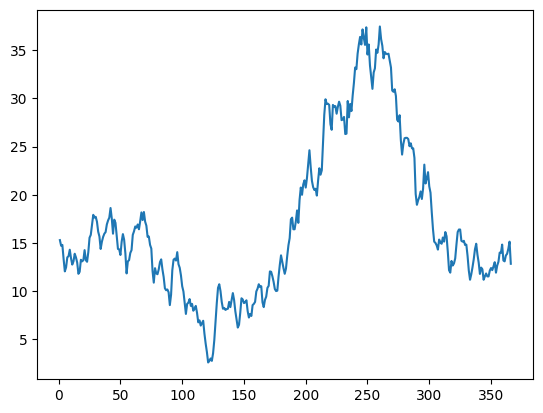

In [22]:
# 12. Calculate the climatology of datapoint counts as a function of dayofyear
## MM Comment: Need to group by day and then take the 'mean' for the climatology (-0.25)

#timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       #index=two_years)

df_month = df.resample('D').count()
df_month = df_month.groupby(by=[df_month.index.dayofyear]).mean()

plt.plot(df_month.index, df_month['NUMBER'])

#df.day = df.ISO_TIME.dayofyear()
#plt.plot(df.day, df.SID.count)